<a href="https://colab.research.google.com/github/forestser/Pyhton/blob/main/05_codelab2_urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



---

# **해결문제**


공공데이터 포털 사이트에서 한국환경공단_에어코리아_미세먼지 경보 발령 현황 자료를 수집하여 분석하시오.


---

In [2]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

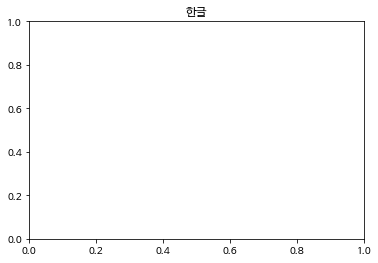

In [2]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

In [23]:
import pandas as pd 

In [34]:
import seaborn as sns

In [35]:
from urllib.request import Request, urlopen
import json  

In [ ]:
url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220103'

In [ ]:
resp = urlopen(url)
resp

In [ ]:
rsp = resp.read().decode('utf-8')


In [ ]:
type(rsp)

str

In [ ]:
rsp = urlopen(url).read().decode('utf-8')

In [ ]:
mvdt = json.loads(rsp)
type(mvdt)

dict

In [ ]:
mvlt = mvdt["boxOfficeResult"]["dailyBoxOfficeList"]

In [7]:
def mv(url) :
  rsp = urlopen(url).read().decode('utf-8')
  mvdt = json.loads(rsp)
  mvlt = mvdt["boxOfficeResult"]["dailyBoxOfficeList"]
  for item in mvlt :
    d = mvdt["boxOfficeResult"]["showRange"][:4] + '-' + mvdt["boxOfficeResult"]["showRange"][4:6] + '-' + mvdt["boxOfficeResult"]["showRange"][6:8]
    print(d,'-', item["rank"], item['movieNm'], item['audiCnt'], item['audiAcc'])

In [9]:
for i in range(1, 32) :
  url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112'
  if i < 10 :
    url = url + '0' + str(i)
  else :
    url = url + str(i)
  mv(url)

2021-12-01 - 1 유체이탈자 28158 468281
2021-12-01 - 2 연애 빠진 로맨스 20372 275782
2021-12-01 - 3 고스트버스터즈 라이즈 20063 20608
2021-12-01 - 4 엔칸토: 마법의 세계 14353 316689
2021-12-01 - 5 라스트 나잇 인 소호 10291 10655
2021-12-01 - 6 듄 8817 1443342
2021-12-01 - 7 태일이 8121 67584
2021-12-01 - 8 귀멸의 칼날: 주합회의·나비저택 편 5234 5234
2021-12-01 - 9 이터널스 4625 3003717
2021-12-01 - 10 장르만 로맨스 3382 487203


KeyboardInterrupt: ignored

In [18]:
def mvApi(n) :
  #url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112' + n
  url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
  url = url + 'key=' + 'f5eef3421c602c6cb7ea224104795888'
  url = url + '&targetDt=202112' + n

  #웹상에서 제공되는 json형태의 자료가져오기
  resp = urlopen(url).read().decode('utf-8')

  #파이썬의 딕션너리 형태로 변형 
  mvdt = json.loads(resp)

  #딕션너리에서 자료 가져오기
  boxOfficeResult = mvdt['boxOfficeResult']

  #일자 만들기
  showRange = boxOfficeResult['showRange']
  day = showRange[:4] + '-' + showRange[4:6] + '-' + showRange[6:8]

  #박스오피스 영화
  dailyBoxOfficeList = boxOfficeResult['dailyBoxOfficeList']

  lines = ''
  for item in dailyBoxOfficeList :
    lines = lines + f"{day},{item['rank']},{item['movieNm']},{item['audiCnt']},{item['audiAcc']}\n"


  return lines

In [20]:
for i  in range(1,5) :
  n = f'{i:02d}'
  url = mvApi(n)

  print(url)


2021-12-01,1,유체이탈자,28158,468281
2021-12-01,2,연애 빠진 로맨스,20372,275782
2021-12-01,3,고스트버스터즈 라이즈,20063,20608
2021-12-01,4,엔칸토: 마법의 세계,14353,316689
2021-12-01,5,라스트 나잇 인 소호,10291,10655
2021-12-01,6,듄,8817,1443342
2021-12-01,7,태일이,8121,67584
2021-12-01,8,귀멸의 칼날: 주합회의·나비저택 편,5234,5234
2021-12-01,9,이터널스,4625,3003717
2021-12-01,10,장르만 로맨스,3382,487203

2021-12-02,1,유체이탈자,25597,493878
2021-12-02,2,연애 빠진 로맨스,18660,294442
2021-12-02,3,엔칸토: 마법의 세계,13484,330173
2021-12-02,4,고스트버스터즈 라이즈,11901,32509
2021-12-02,5,듄,7977,1451319
2021-12-02,6,라스트 나잇 인 소호,7237,17892
2021-12-02,7,태일이,4516,72100
2021-12-02,8,이터널스,3821,3007538
2021-12-02,9,장르만 로맨스,3729,490932
2021-12-02,10,뱅드림! 필름 라이브 세컨드 스테이지,2347,19943

2021-12-03,1,유체이탈자,29150,523028
2021-12-03,2,연애 빠진 로맨스,21918,316360
2021-12-03,3,엔칸토: 마법의 세계,16199,346372
2021-12-03,4,고스트버스터즈 라이즈,10969,43478
2021-12-03,5,듄,10296,1461615
2021-12-03,6,라스트 나잇 인 소호,4865,22757
2021-12-03,7,이터널스,4715,3012253
2021-12-03,8,태일이,3728,75828
2021-12-03,9,장르만 로맨스,3623,494555
2021-12-0

In [ ]:
with open('/content/drive/MyDrive/BSSM2022/BSSM2022/data/mv.scv','w') as fp :
  fp.write('일자,순위,영화명,일관객수,누적관객수\n')

with open('/content/drive/MyDrive/BSSM2022/BSSM2022/data/mv.scv','a') as fp :
  for i  in range(1,11) :
    n = f'{i:02d}'
    lines = mvApi(n)

    print(lines)
    fp.write(lines)

In [26]:
df = pd.read_csv('/content/drive/MyDrive/BSSM2022/BSSM2022/data/mv.scv')
df.head()

,일자,순위,영화명,일관객수,누적관객수
0,2021-12-01,1,유체이탈자,28158,468281
1,2021-12-01,2,연애 빠진 로맨스,20372,275782
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655


In [27]:
df['일관객수'].max()

54578

In [28]:
df[df['일관객수']==df['일관객수'].max()]

,일자,순위,영화명,일관객수,누적관객수
30,2021-12-04,1,유체이탈자,54578,577606


In [29]:
df['일자'] = pd.to_datetime(df['일자'])

In [31]:
df['월'] = df['일자'].dt.month
df['요일'] =  df['일자'].dt.day

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      100 non-null    datetime64[ns]
 1   순위      100 non-null    int64         
 2   영화명     100 non-null    object        
 3   일관객수    100 non-null    int64         
 4   누적관객수   100 non-null    int64         
 5   월       100 non-null    int64         
 6   요일      100 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 5.6+ KB


In [39]:
df['요일'] = df['일자'].dt.weekday


In [40]:
df['요일명'] = df['요일'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
df.head()

,일자,순위,영화명,일관객수,누적관객수,월,요일,요일명
0,2021-12-01,1,유체이탈자,28158,468281,12,2,수
1,2021-12-01,2,연애 빠진 로맨스,20372,275782,12,2,수
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608,12,2,수
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689,12,2,수
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655,12,2,수


In [41]:
df.sort_values('일관객수', ascending=False)

,일자,순위,영화명,일관객수,누적관객수,월,요일,요일명
30,2021-12-04,1,유체이탈자,54578,577606,12,5,토
40,2021-12-05,1,유체이탈자,48900,626506,12,6,일
31,2021-12-04,2,엔칸토: 마법의 세계,47155,393527,12,5,토
41,2021-12-05,2,엔칸토: 마법의 세계,44441,437968,12,6,일
32,2021-12-04,3,연애 빠진 로맨스,42545,358905,12,5,토
...,...,...,...,...,...,...,...,...
79,2021-12-08,10,장르만 로맨스,1567,508815,12,2,수
68,2021-12-07,9,장르만 로맨스,1518,507248,12,1,화
29,2021-12-03,10,귀멸의 칼날: 주합회의·나비저택 편,1367,8054,12,4,금
59,2021-12-06,10,킬링 카인드: 킬러의 수제자,1105,7894,12,0,월


In [42]:
df.groupby('영화명').mean()[['일관객수']].sort_values('일관객수', ascending=False).head(5)
df.groupby('요일명').mean()[['일관객수']]

,일관객수
요일명,
금,8978.85
목,8394.25
수,9662.85
월,5886.20
일,19212.30
토,21343.90
화,5659.20


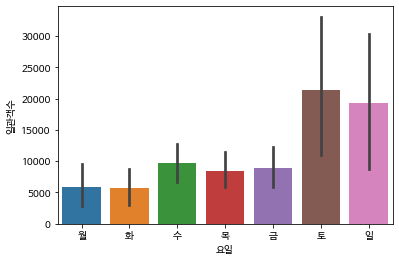

In [43]:
sns.barplot(x='요일', y='일관객수', data=df)
plt.xticks(range(7), labels=['월','화','수','목','금','토','일'])
plt.show()

+ 공공데이터 포털 : https://www.data.go.kr/

# 파일(File)
## **파일 생성**
+ 파일 객체 = open(파일 이름, 파일 열기 모드, encoding='UTF-8’)
 - 한글이 포함된 파일 입력시 UnicodeDecodeError 에러가 발생하면 encoding 값을 'cp949' 사용

+ 파일 열기 모드
 - r	읽기모드 - 파일을 읽기만 할 때 사용
 - w	쓰기모드 - 파일에 내용을 쓸 때 사용
 - a	추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용


## **파일입력 메소드**
+ 파일객체.readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ 파일객체.readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ 파일객체.read(): 파일의 내용 전체를 문자열로 리턴


## **파일출력 메소드**
+ 파일객체.write()


## with…as 
+ **파일을 open한 후 with…as 구문이 끝나면 자동으로 close**
```
with open(파일 경로, 모드) as 파일 객체:
```

In [ ]:
#자료 불러오기 
df =  
df

,지역명,권역명,항목명,경보단계,발령일,발령시간,발령농도,해제일,해제시간,해제농도
0,세종,세종권역,PM25,주의보,2020-12-29,12:00,80,2020-12-29,19:00,33
1,충북,중부권역,PM25,주의보,2020-12-29,13:00,77,2020-12-29,19:00,33
2,충남,북부권역,PM25,주의보,2020-12-28,21:00,76,2020-12-29,22:00,28
3,대구,대구권역,PM25,주의보,2020-12-28,14:00,83,2020-12-28,16:00,34
4,대구,대구권역,PM25,주의보,2020-12-24,11:00,80,2020-12-24,15:00,26
...,...,...,...,...,...,...,...,...,...,...
299,충남,북부권역,PM25,주의보,2020-01-03,11:00,85,2020-01-05,15:00,31
300,전북,익산권역,PM25,주의보,2020-01-03,02:00,80,2020-01-05,15:00,19
301,전북,장수권역,PM25,주의보,2020-01-04,00:00,77,2020-01-04,14:00,29
302,충북,중부권역,PM25,주의보,2020-01-03,12:00,76,2020-01-05,16:00,33


In [ ]:
import seaborn as sns

In [ ]:
df['지역명'].value_counts().index

Index(['전북', '경기', '충남', '경남', '충북', '인천', '서울', '광주', '세종', '대구', '강원', '전남',
       '경북', '부산', '제주', '대전', '울산'],
      dtype='object')

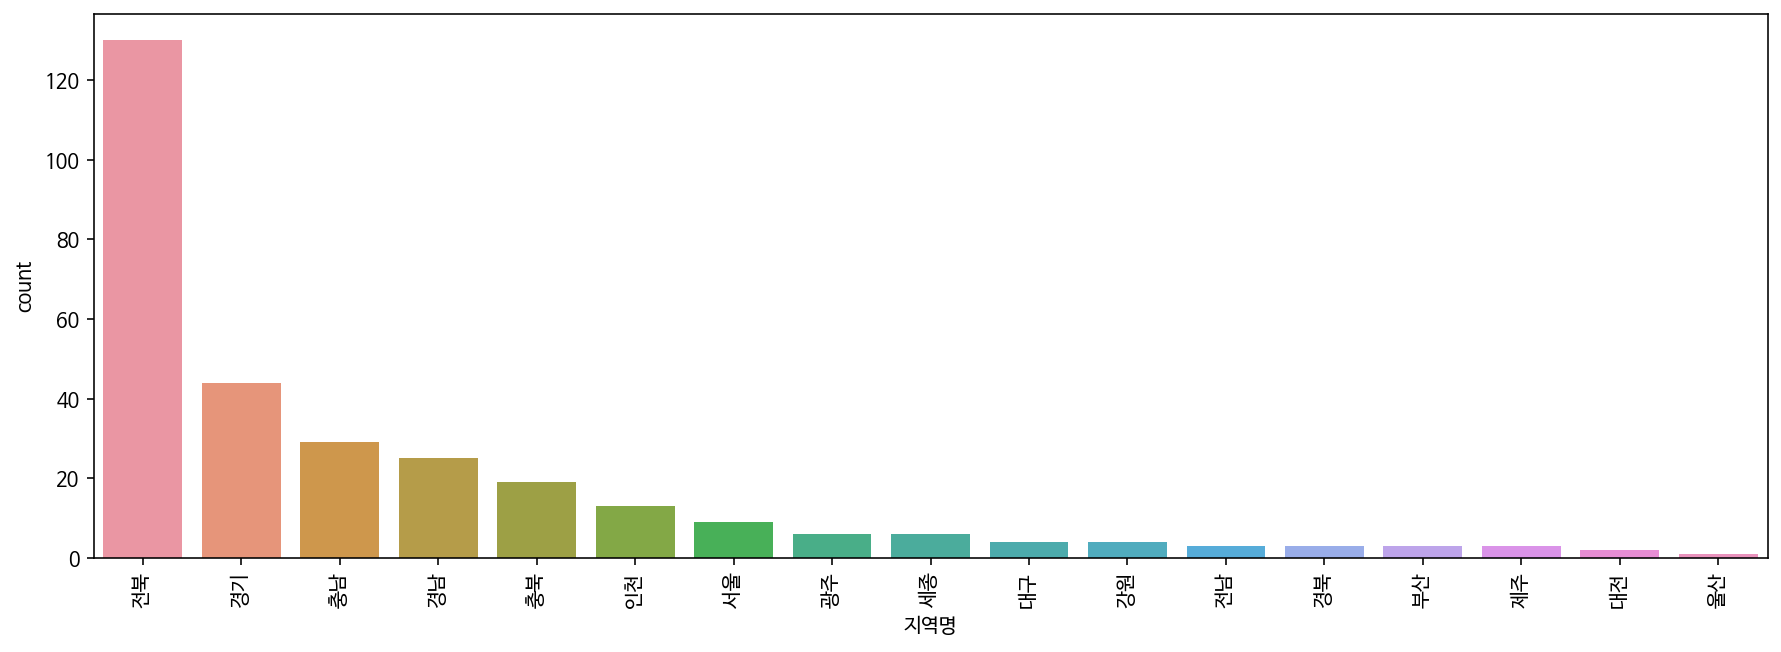

In [ ]:
plt.figure(figsize=(15,5))
 
plt.xticks(rotation=90)
plt.show()

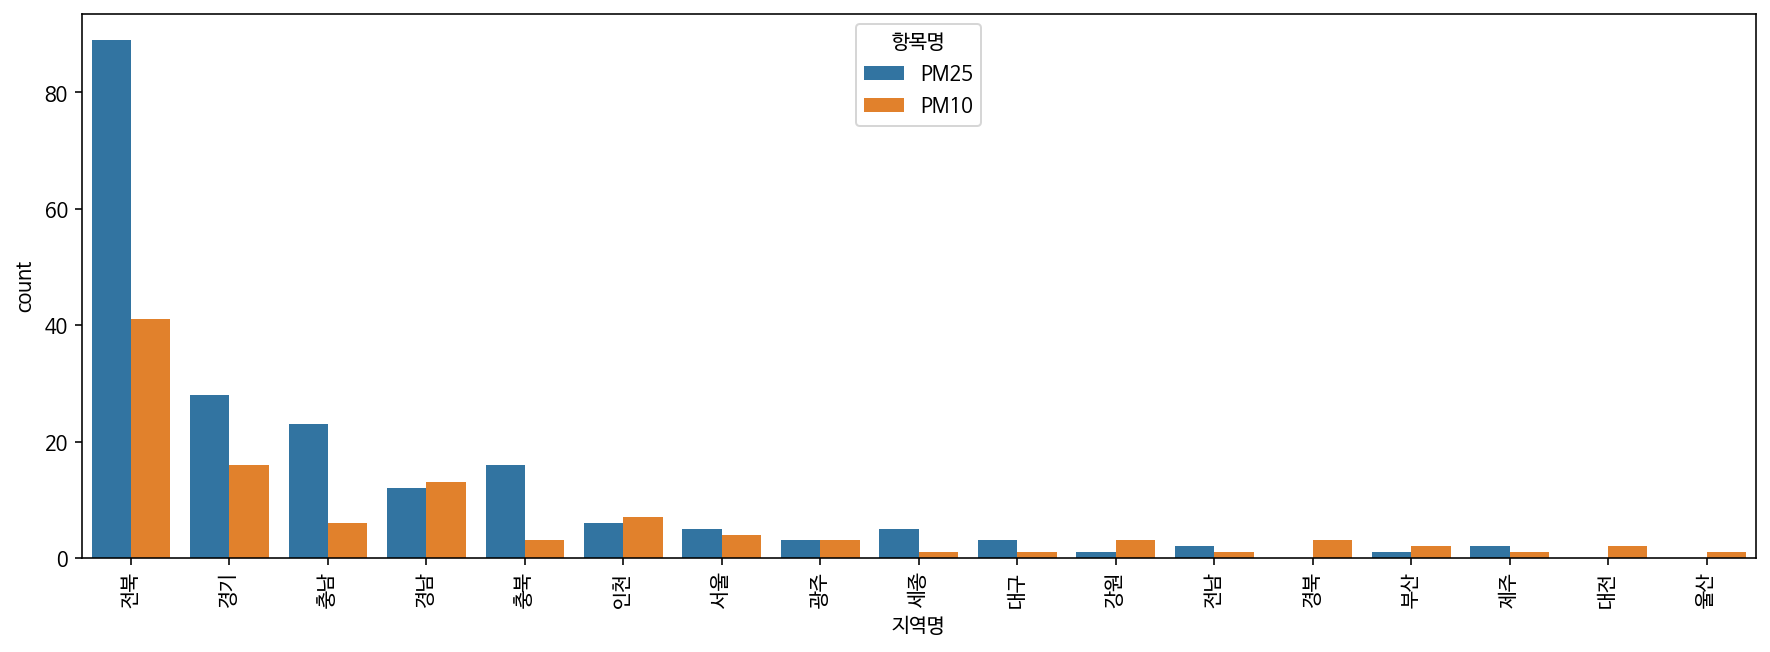

In [ ]:
plt.figure(figsize=(15,5))
 
plt.xticks(rotation=90)
plt.show()

In [ ]:
pm25 = df[df['항목명']=='PM25']

In [ ]:
pm25

,지역명,권역명,항목명,경보단계,발령일,발령시간,발령농도,해제일,해제시간,해제농도
0,세종,세종권역,PM25,주의보,2020-12-29,12:00,80,2020-12-29,19:00,33
1,충북,중부권역,PM25,주의보,2020-12-29,13:00,77,2020-12-29,19:00,33
2,충남,북부권역,PM25,주의보,2020-12-28,21:00,76,2020-12-29,22:00,28
3,대구,대구권역,PM25,주의보,2020-12-28,14:00,83,2020-12-28,16:00,34
4,대구,대구권역,PM25,주의보,2020-12-24,11:00,80,2020-12-24,15:00,26
...,...,...,...,...,...,...,...,...,...,...
299,충남,북부권역,PM25,주의보,2020-01-03,11:00,85,2020-01-05,15:00,31
300,전북,익산권역,PM25,주의보,2020-01-03,02:00,80,2020-01-05,15:00,19
301,전북,장수권역,PM25,주의보,2020-01-04,00:00,77,2020-01-04,14:00,29
302,충북,중부권역,PM25,주의보,2020-01-03,12:00,76,2020-01-05,16:00,33


In [ ]:
pm25['경보단계'].value_counts()

주의보    196
Name: 경보단계, dtype: int64

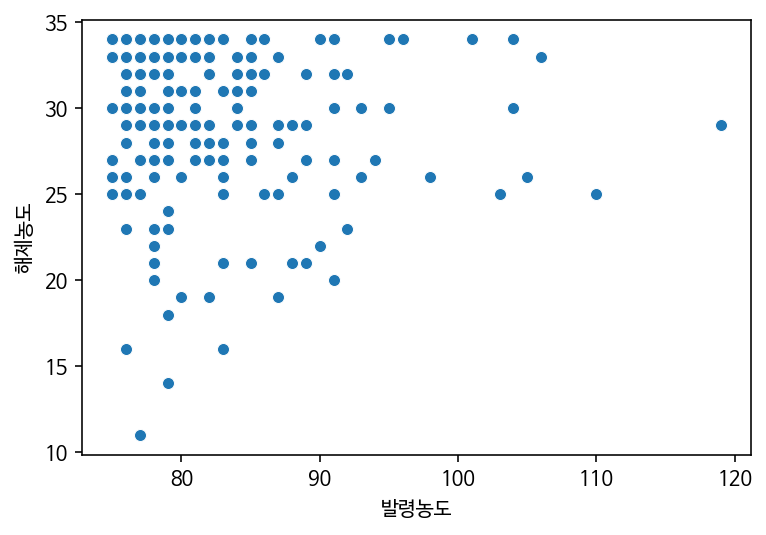

In [ ]:
 
plt.show()